## Importing the dataset

In [547]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import random
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(filepath_or_buffer="em_data.txt", sep="\s+", header=None)
data = data[0]
data

0      0
1      2
2      0
3      1
4      4
      ..
995    2
996    0
997    1
998    2
999    4
Name: 0, Length: 1000, dtype: int64

## Initialising parameters and means

In [548]:
n = data.shape[0]
lambda_fp  = np.random.uniform (data.min(), data.mean()-1) 
lambda_nfp = np.random.uniform (data.mean()+1, data.max())  
pi_fp = np.random.uniform(0, 1)  
pi_nfp = np.random.uniform(0, 1) 

epochs = 500        # max no. of epochs 
L = []              # storing log-likelihoods for checking termination condition and plotting
tol = 5e-5          # threshold (min) change in L for early terminationm

## Running the EM Algorithm

In [549]:



for epoch in range(epochs):
    
    # E-step
    
    # Calculate the responsibilities (gamma) for array of families
    p_i_fp = poisson.pmf(data, lambda_fp)
    p_i_nfp = poisson.pmf(data, lambda_nfp)
    gamma_fp = pi_fp * p_i_fp
    gamma_nfp = pi_nfp * p_i_nfp

    gamma_sum = gamma_fp + gamma_nfp
    gamma_fp = gamma_fp / gamma_sum  
    gamma_nfp = gamma_nfp / gamma_sum  


    # M-step: 

    # Update the means using the weighted average of the data points
    lambda_fp = np.dot(data, gamma_fp) / np.sum(gamma_fp) 
    lambda_nfp = np.dot(data, gamma_nfp) / np.sum(gamma_nfp) 
    
    # Update the parameters based on the responsibilities (gamma)
    pi_fp = np.mean(gamma_fp)
    pi_nfp = np.mean(gamma_nfp)

    # Calculate and store the log-likelihood
    p_i_fp_new = poisson.pmf(data, lambda_fp)
    p_i_nfp_new = poisson.pmf(data, lambda_nfp)
    gamma_fp_new = pi_fp * p_i_fp_new
    gamma_nfp_new = pi_nfp * p_i_nfp_new

    L_epoch = np.sum(np.log(gamma_fp_new + gamma_nfp_new))
    L.append(L_epoch)

    # Check for convergence (if log-likelihood is changing slower than tolerance rate)
    if epoch > 1 and np.abs(L[-1] - L[-2]) < tol:
        print(f"Converged at {epoch} epochs")
        break



Converged at 108 epochs


## Visualising the change in log-likelihood with epochs

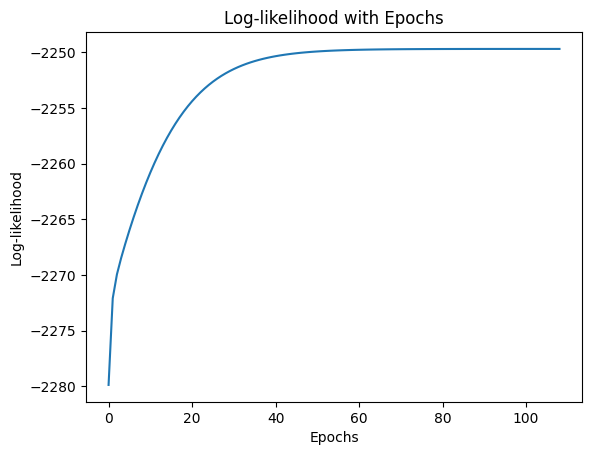

In [550]:
# plot log likelihood
plt.plot(L)
plt.xlabel('Epochs')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood with Epochs')
plt.show()

## Results 

In [551]:
print("Estimated means and parameters:")
print(f"Mean no. of children in families with family planning: {lambda_fp}")
print(f"Mean no. of children in families without family planning: {lambda_nfp}")
print(f"Proportion of families with family planning: {pi_fp}")
print(f"Proportion proportion of families without family planning: {pi_nfp}")


Estimated means and parameters:
Mean no. of children in families with family planning: 1.7871346428960713
Mean no. of children in families without family planning: 4.914730033999356
Proportion of families with family planning: 0.35737680045789616
Proportion proportion of families without family planning: 0.6426231995421038
